In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numba
import time

In [58]:
d = pd.read_csv('ValsCoordsPanoramaAlternas3.csv')

In [59]:
print("Size :", d.size)
print("Shape:", d.shape)
print(d.head())

Size : 1629744
Shape: (203718, 8)
   ID           Species  code  longitude  latitude  bio_10  bio_11  bio_12
0   1  Adiantum_lucidum     1     -80.86      8.43     242     228    3183
1   2  Adiantum_lucidum     1     -80.61      7.74     270     254    1832
2   3  Adiantum_lucidum     1     -80.37      8.60     272     253    2491
3   4  Adiantum_lucidum     1     -80.14      8.63     238     222    2893
4   5  Adiantum_lucidum     1     -80.10      9.15     272     257    3301


In [81]:
names = set(d.loc[:, 'Species'])

In [82]:
print("Number of species: ", len(names))

Number of species:  187


In [84]:
(*names)

SyntaxError: can't use starred expression here (<ipython-input-84-fad7abee94cf>, line 1)

In [62]:
coord_folder = 'HexagonsCoordsVars/'
nubes = pd.DataFrame()
for i in range(3000, 136000, 1000):
    try:
        filename = coord_folder + 'vars_coords_' + str(i) + '.csv'
        tmp = pd.read_csv(filename)
        nubes = nubes.append(tmp)
    except:
        pass

In [63]:
print(nubes.head())

   UniqueID  SiteID  Longitude   Latitude   puntos10    puntos11    puntos12
0         4     594     -80.75  82.834936  -3.800000 -392.799988   70.000000
1         5     595     -79.25  82.834936 -21.650000 -406.799988  112.300003
2         6     596     -77.75  82.834936 -17.049999 -394.049988  103.750000
3         7     597     -76.25  82.834936 -29.200001 -401.200012  135.300003
4        11     698     -86.00  82.401924   0.800000 -404.350006   64.900002


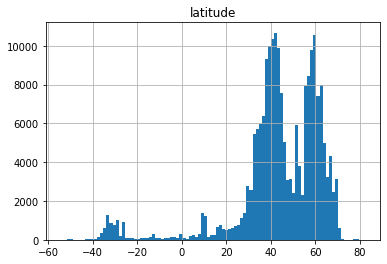

In [64]:
latitude_hist = d.hist(column='latitude', bins=100)

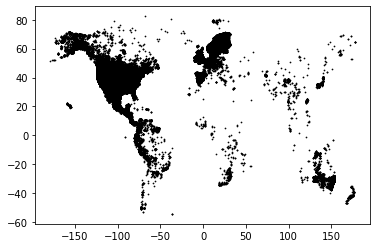

In [65]:
plt.scatter(d.longitude, d.latitude, color='black', s=0.5)

In [66]:
s = d['Species'].to_numpy()
bio10 = d['bio_10'].to_numpy()
bio11 = d['bio_11'].to_numpy()
bio12 = d['bio_12'].to_numpy()
lat   = d['latitude'].to_numpy()
lon   = d['longitude'].to_numpy()
bio_data = list(zip(bio10, bio11, bio12))
loc_data = list(zip(lat, lon))

In [67]:
cur_list = 0
bios = [[]]
locs = [[]]
for i in range(1, s.size):
    if s[i] != s[i-1]:
        cur_list += 1
        bios.append([])
        locs.append([])
    bios[cur_list].append(bio_data[i])
    locs[cur_list].append(loc_data[i])

In [85]:
correlation_max = 0.975
tmp_bios = []
tmp_locs = []
tmp_names = []
names_lst = sorted(names)
for i in range(len(bios)):
    corr = np.corrcoef(bios[i], rowvar=False)
    if not (len(bios[i]) < 9 or np.abs(corr[0][1]) > correlation_max or np.abs(corr[0][2]) > correlation_max):
        tmp_bios.append(bios[i])
        tmp_locs.append(locs[i])
        tmp_names.append(names_lst[i])

In [151]:
bios = tmp_bios
locs = tmp_locs
names = tmp_names

In [155]:
nlat = nubes['Latitude'].to_numpy()
nlon = nubes['Longitude'].to_numpy()

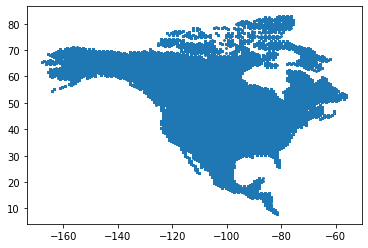

In [158]:
plt.scatter(nlon, nlat, s=1.5)

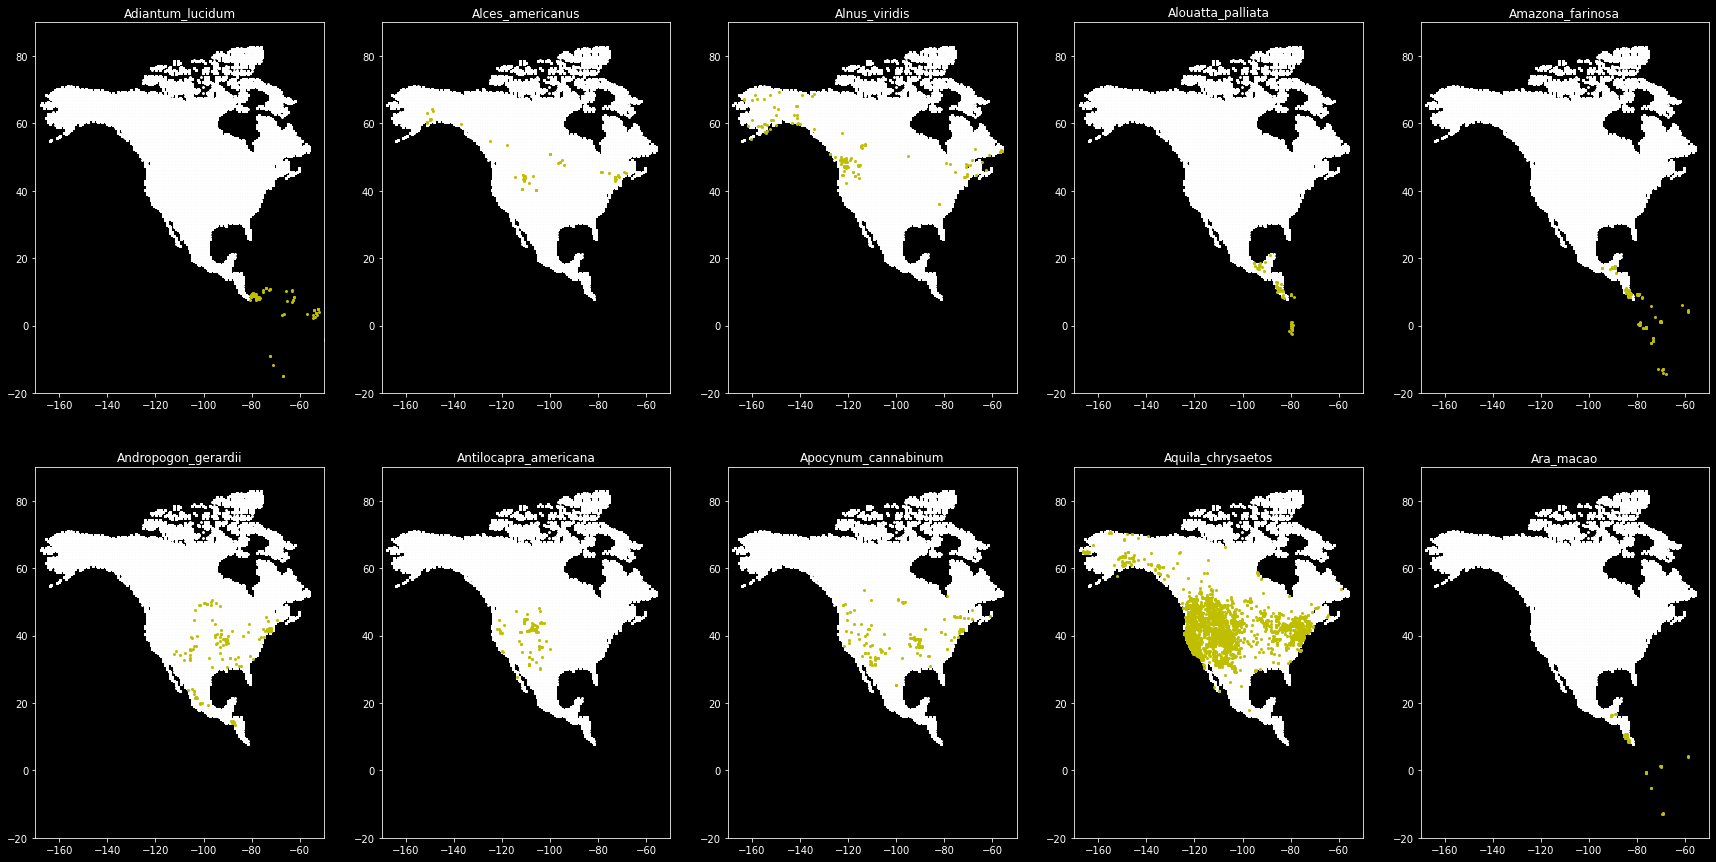

In [190]:
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(30, 15))
plt.style.use(['dark_background'])
for row in range(rows):
    for col in range(cols):
        i = (5 * row) + col
        loc = np.array(locs[i]).T
        axes[row, col].scatter(nlon, nlat, s=1.5, c='white')
        axes[row, col].scatter(loc[1], loc[0], c='y', s=4)
        axes[row, col].set_xlim([-170, -50])
        axes[row, col].set_ylim([-20, 90])
        axes[row, col].set_title(names[i])
        
plt.savefig('locs.jpg')


5